Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name and collaborators:

In [1]:
NAME = "Lucy Yang"
COLLABORATORS = ""

## Assignment 2 - Data Analysis using Pandas
**(15 points total)**

For this assignment, we will analyze the open dataset with data on the passengers aboard the Titanic.

The data file for this assignment can be downloaded from Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. It is also attached to the assignment page. The definition of all variables can be found on the same Kaggle page, in the Data Dictionary section.

Read the data from the file into pandas DataFrame. Analyze, clean and transform the data to answer the following question: 

**What categories of passengers were most likely to survive the Titanic disaster?**

**Question 1.**  _(4 points)_
* The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster? _(2 points)_
    * Looking at individual attributes, the following categories of passengers were more likely to survive:
        - Women
        - Passengers around the age of 25 (15-40 year olds as well as babies/toddlers < 5 also have a decent chance of survival)
        - Passengers who did not have any family on board
        - Passengers who were in first class
    * 2 variables:
         - In the same passenger class, women are just as likely to survive than men in first class, more likely to survive in 2nd and less likely in 3rd
         - Women more likely to survive in all age ranges than men, but there were also more women on board to start with
        
* The detailed explanation of the logic of the analysis _(2 points)_
    * I thought that women and childen were prioritized in getting onto life boats from the Titanic movie. Thus I split the original dataframe by all male passengers, all female passengers, survivors, male survivors, and female survivors. I first looked at the sex composition of survivors against all survivors, just to make sure that there were not more female survivors because there were more females on board to start with. Then I compared the age distribution for each of those categories, again to make sure that there age range with the most survivors were not disproportionally large in all passengers. I then continued comparing the distribution for passenger class, fare, SibSp+Parch and embarkment location between sexes of survivors and sexes of all passengers. At this point I'm trying to figure out which demographic to focus on. I used a scatter plot to determine the relationship between fare values and the passenger class. The conclusion I was able to draw was that there was no clear correlation between the two, as some first class fares were as low as third class fares. There was also one outlier at approimately $500. I then looked at the embarkment location split among survivors. The proportions were close enough to that of all passengers that I believe it has no real correlation probability of survival.
    * Focusing on the 15-40 year group as most survivors seem to belong in that category, I looked at the split of # family members they traveled with, and class. Both distributions looked proportional to that of total survivors.
    * Testing my hypothesis of whether solo travelers were more likely to survive, I looked at the age and class distribution of survivors and all passengers. The results were that most solo travelers belonged to the age 15-40 group which indicates correlation. For the class distribution, survivors who were traveling solo belonged to first and third class were pretty close, where as there were significantly more solo travelers in third class when looking at all passengers. The lack of proportion here leads me to think that passenger class is not very important in determining probability of survival. Instead, it is sex, and age or traveling by oneself (those two could be closely related as well).


**Question 2.**  _(3 points)_
* What other attributes did you use for the analysis? Explain how you used them and why you decided to use them. 
    * 
        - Survived - Used to filter for passengers who actually survived the wreck, to allow for analysis of their characteristics/attributes
        - Sex - As it was said at the end of the movie, women and children first. Data was further split by sex to determine if the remaining attributes had strong correlations to survival
        - Age - Statistical value of life decreases as age increases. Compared between all passengers, all survivors and the sexes among survivors.
        - SibSp/Parch (summed to make the Family column) - Thought those by themselves didn't have to focus their attention/efforts on family and would therefore be more likely to survive. These were first compared between sexes and among all survivors, then among survivors 15-40 years old (as they made up majority of the survivors).
        - Pclass - Thought first class would take priority. Compared between sexes among all survivors, as well as survivors 15-40 years
        - Fare - Used to verify relationship against passenger class. The scatter plot against passenger class indicates that there is no strong correlaton between the two attributes.
        - Embarked - Was not sure if this attribute was useful, so kept it in. Compared against all passengers
        
* Provide a complete list of all attributes used.
    * Attributes used are Survived, Pclass, Sex, Age, SibSp, Parch, Fare and Embarked

**Question 3.**  _(3 points)_
* Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis?
     * Yes, I created the Family attribute through addition of SibSp and Parch, as there were a lot of similarities when previously analyzing the two attributes separately. There were also some overlaps in determining if the people who traveled without parents/children were also without siblings/spouses. Therefore it was just easier to add them together and use the sum.
* If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.
    * Attributes excluded are passender ID, name, ticket and cabin. Rational as follows:
        - PassengerId - originally used as the index, but realized that after filtering for suvived=1, this would no longer be consecutive
        - Name - irrelevant to survival as we have other characteristics of the passengers
        - Ticket - refers to ticket number and seems to be a series of random numbers
        - Cabin - this data is missing for >2/3 of the entire data, thus difficult to use to form any conclusions. We also don't know what the layout of the ship is and what the cabin number refers to where the room is located

**Question 4.**  _(5 points)_
* How did you treat missing values for those attributes that you included in the analysis (for example, `age` attribute)? Provide a detailed explanation in the comments.
    * Out of the columns that I used, Embarked had 2 missing values. I dropped those rows as it was not a significant quantity. Age had 177 missing values, 52 of which belonged to survivors. I dropped the rows those rows as well, although out of 342 survivor entries, ~15% isn't insignificant. I then tried to fill them  with the survivor mean age. That didn't seem like the correct method as it increased the height of the existing peak. I then tried to create an array of normal distribution values, with the same mean and standard deviation as the survivor age distribution. However, I ran into a lot of trouble with the filling part and eventually gave up. I think this might've been a better solution than dropping the values or filling with a scalar.

In [2]:
#load libraries and read data csv file

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

In [3]:
#inspect dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
#Check for missing data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Drop columns that have no correlation to survival
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
df.insert(8, "Family", df.SibSp+df.Parch)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [9]:
#Check for survivors
survived=df.loc[df['Survived']==1]
survived.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
8,1,3,female,27.0,0,2,11.1333,S,2
9,1,2,female,14.0,1,0,30.0708,C,1


In [10]:
survived.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 1 to 889
Data columns (total 9 columns):
Survived    342 non-null int64
Pclass      342 non-null int64
Sex         342 non-null object
Age         290 non-null float64
SibSp       342 non-null int64
Parch       342 non-null int64
Fare        342 non-null float64
Embarked    340 non-null object
Family      342 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 26.7+ KB


In [11]:
#Split data based on sex
#Female
survived_f=survived.loc[survived['Sex']=='female']
survived_f.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
8,1,3,female,27.0,0,2,11.1333,S,2
9,1,2,female,14.0,1,0,30.0708,C,1


In [12]:
#Male
survived_m=survived.loc[survived['Sex']=='male']
survived_m.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
17,1,2,male,NaN,0,0,13.0000,S,0
21,1,2,male,34.0,0,0,13.0000,S,0
23,1,1,male,28.0,0,0,35.5000,S,0
36,1,3,male,NaN,0,0,7.2292,C,0
55,1,1,male,NaN,0,0,35.5000,S,0


In [13]:
print(df.Sex.value_counts())
print(survived.Sex.value_counts())

survived.Sex.value_counts()/df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64
female    233
male      109
Name: Sex, dtype: int64


female    0.742038
male      0.188908
Name: Sex, dtype: float64

In [14]:
#See from above that 74% of female passengers and 19% of male passengers survived
print("% of all passengers that were women = ", round(len(df[df['Sex']=='female'])/len(df)*100,2))
print("% of survivors that were women", round(len(survived[survived['Sex']=='female'])/len(survived)*100,2))

% of all passengers that were women =  35.24
% of survivors that were women 68.13


In [15]:
#Create separate dataframes for sexes from all passengers
all_m=df.loc[df['Sex']=='male']
all_f=df.loc[df['Sex']=='female']
all_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 1 to 888
Data columns (total 9 columns):
Survived    314 non-null int64
Pclass      314 non-null int64
Sex         314 non-null object
Age         261 non-null float64
SibSp       314 non-null int64
Parch       314 non-null int64
Fare        314 non-null float64
Embarked    312 non-null object
Family      314 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 24.5+ KB


In [16]:
all_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 890
Data columns (total 9 columns):
Survived    577 non-null int64
Pclass      577 non-null int64
Sex         577 non-null object
Age         453 non-null float64
SibSp       577 non-null int64
Parch       577 non-null int64
Fare        577 non-null float64
Embarked    577 non-null object
Family      577 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 45.1+ KB


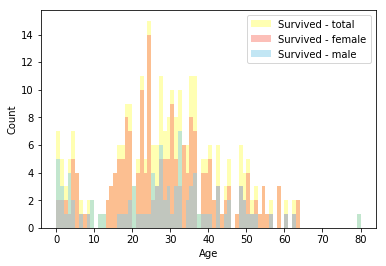

In [17]:
#Compare age among survivors
bins = np.arange(0, survived.Age.max()+1, 1)
plt.hist(survived.Age.dropna().astype(int), bins, color='yellow', label='Survived - total', alpha=0.3)
plt.hist(survived_f.Age.dropna().astype(int), bins, color='salmon', label='Survived - female', alpha=0.5)
plt.hist(survived_m.Age.dropna().astype(int), bins, color='skyblue', label='Survived - male', alpha=0.5)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

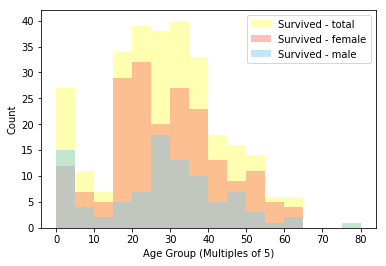

In [18]:
#Compare age in multiples of 5 yrs
bins_age5 = np.arange(0, survived.Age.max()+1, 5)
plt.hist(survived.Age.dropna().astype(int), bins_age5, color='yellow', label='Survived - total', alpha=0.3)
plt.hist(survived_f.Age.dropna().astype(int), bins_age5, color='salmon', label='Survived - female', alpha=0.5)
plt.hist(survived_m.Age.dropna().astype(int), bins_age5, color='skyblue', label='Survived - male', alpha=0.5)
plt.legend()
plt.xlabel('Age Group (Multiples of 5)')
plt.ylabel('Count')
plt.show()

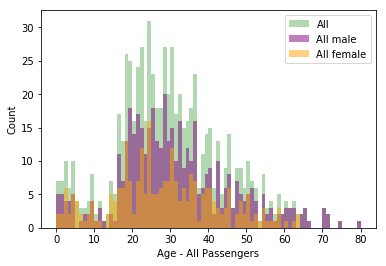

In [19]:
#Compare age among all passengers
bins = np.arange(0, survived.Age.max()+1, 1)
plt.hist(df.Age.dropna().astype(int), bins, color='green', label='All', alpha=0.3)
plt.hist(all_m.Age.dropna().astype(int), bins, color='purple', label='All male', alpha=0.5)
plt.hist(all_f.Age.dropna().astype(int), bins, color='orange', label='All female', alpha=0.5)
plt.legend()
plt.xlabel('Age - All Passengers')
plt.ylabel('Count')
plt.show()

In [20]:
print("% of children under age of 15 whos survived = ",round(len(survived.loc[survived['Age']<=15])/len(df.loc[df['Age']<=15])*100,2))

% of children under age of 15 whos survived =  59.04


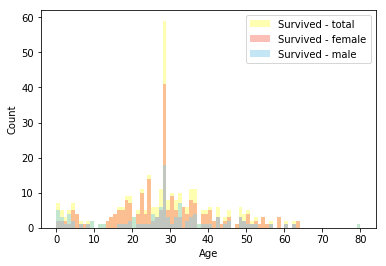

In [21]:
#Are the missing age values significant? Replace with mean and compare with above graphs
plt.hist(survived.Age.fillna(survived.Age.mean()), bins, color='yellow', label='Survived - total', alpha=0.3)
plt.hist(survived_f.Age.fillna(survived.Age.mean()), bins, color='salmon', label='Survived - female', alpha=0.5)
plt.hist(survived_m.Age.fillna(survived.Age.mean()), bins, color='skyblue', label='Survived - male', alpha=0.5)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [22]:
#No, this will significantly skew the distribution
#What if we fill missing values with random values of a normal distribution with same mean and std as survived.Age?

# missing_age=survived.loc[survived.Age.isnull()]
# fill_age=pd.DataFrame(np.random.normal(survived.Age.mean(), survived.Age.std(), size=len(missing_age)))
# print(len(survived.Age.loc[survived['Age'].isnull()==True]))

#Aaaaand this is where I got stuck
    
# missing_age.Age
#plt.hist(survived.Age, color='yellow', label='Survived - total', alpha=0.3)
#plt.hist(survived_f.Age, bins, color='salmon', label='Survived - female', alpha=0.5)
#plt.hist(survived_m.Age, bins, color='skyblue', label='Survived - male', alpha=0.5)
# plt.legend()
# plt.xlabel('Age')
# plt.ylabel('Count')
#plt.show()

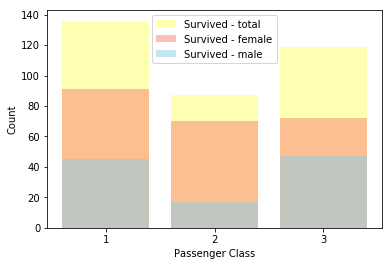

In [23]:
pclass, pclass_count_f=np.unique(survived_f.Pclass, return_counts=True)
pclass_m, pclass_count_m=np.unique(survived_m.Pclass, return_counts=True)
pclass_f, pclass_count=np.unique(survived.Pclass, return_counts=True)

plt.bar(pclass, pclass_count, color='yellow', label='Survived - total', alpha=0.3)
plt.bar(pclass_m, pclass_count_f, color='salmon', label='Survived - female', alpha=0.5)
plt.bar(pclass_f, pclass_count_m, color='skyblue', label='Survived - male', alpha=0.5)
plt.xticks(pclass)
plt.legend()
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


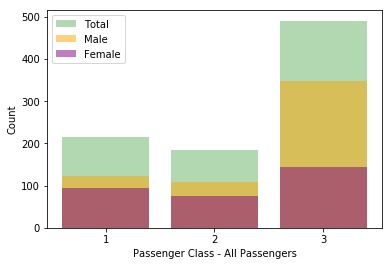

In [24]:
#Men in first class just as likely to survive as women, less likely to survive in 2nd class and more likely to survive in 
#3rd class
#Look at distribution among all passengers

pclass, pclass_count=np.unique(df.Pclass, return_counts=True)
pclass, pclass_count_am=np.unique(all_m.Pclass, return_counts=True)
pclass, pclass_count_af=np.unique(all_f.Pclass, return_counts=True)

plt.bar(pclass, pclass_count, color='green', label='Total', alpha=0.3)
plt.bar(pclass, pclass_count_am, color='orange', label='Male', alpha=0.5)
plt.bar(pclass, pclass_count_af, color='purple', label='Female', alpha=0.5)
plt.xticks(pclass)
plt.legend()
plt.xlabel('Passenger Class - All Passengers')
plt.ylabel('Count')
plt.show()

In [25]:
#There are significantly more males in 3rd class, but survival for that category is disproportionally low

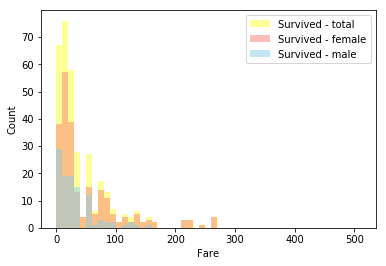

In [26]:
#Analyze impact of fare on likelihood of survival
fare_bins=np.arange(0, survived.Fare.max()+1, 10)
plt.hist(survived.Fare.dropna().astype(int), fare_bins, color='yellow', label='Survived - total', alpha=0.4)
plt.hist(survived_f.Fare.dropna().astype(int), fare_bins, color='salmon', label='Survived - female', alpha=0.5)
plt.hist(survived_m.Fare.dropna().astype(int), fare_bins, color='skyblue', label='Survived - male', alpha=0.5)
plt.legend()
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

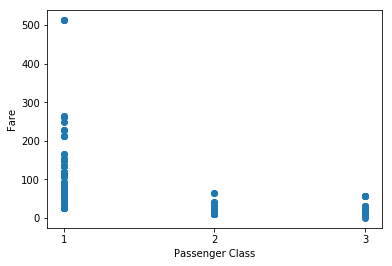

In [27]:
#Is there a relationship between passenger class and fare costs?
plt.scatter(survived.Pclass, survived.Fare)
plt.xticks([1,2,3])
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.show()

In [28]:
#Fares for classes 2 and 3 are towards the lower end of the scale, but seems like some some class 1 fares are also within that
#range
print("Max fare for survivors in passenger class 2 is", survived.loc[survived['Pclass']==2].Fare.max())
print("Max fare for survivors in passenger class 3 is", survived.loc[survived['Pclass']==3].Fare.max())
print("Total surivors in class 1 is", len(survived[survived['Pclass']==1]))
print("# surivors in class 1 with fare <= class 2 is ", len(survived.loc[(survived['Pclass']==1) & (survived['Fare']<=65)]))
#Wide range for class 1 fares. Approx 40% of class 1 survivors paid less for their ticket than the survivors in class 2.
#Therefore I don't believe Fare has a strong correlation with survival

Max fare for survivors in passenger class 2 is 65.0
Max fare for survivors in passenger class 3 is 56.4958
Total surivors in class 1 is 136
# surivors in class 1 with fare <= class 2 is  57


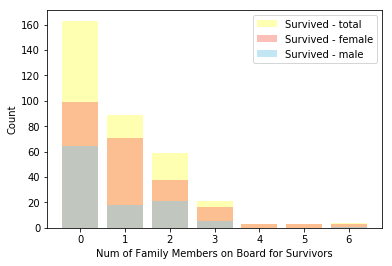

In [29]:
#Compare sibling/spouse counts for survivors
fam_f, fam_count_f = np.unique(survived_f.Family, return_counts=True)
fam_m, fam_count_m=np.unique(survived_m.Family, return_counts=True)
fam, fam_count=np.unique(survived.Family, return_counts=True)

plt.bar(fam, fam_count, color='yellow',label='Survived - total', alpha=0.3)
plt.bar(fam_f, fam_count_f, color='salmon', label='Survived - female', alpha=0.5)
plt.bar(fam_m, fam_count_m, color='skyblue',label='Survived - male', alpha=0.5)

plt.ylabel("Count")
plt.xlabel("Num of Family Members on Board for Survivors")
plt.legend()
plt.show()
#General trend is that the more people you're traveling with, the less likely you'll be to survive
#More women traveling alone survived

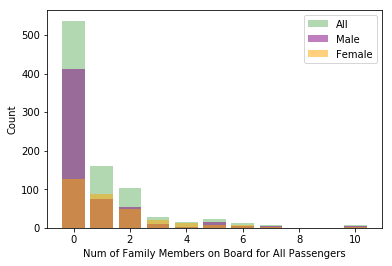

In [30]:
#Compare sibling/spouse counts for all passengers
fam_af, fam_count_af = np.unique(all_f.Family, return_counts=True)
fam_am, fam_count_am=np.unique(all_m.Family, return_counts=True)
fam_a, fam_count_a=np.unique(df.Family, return_counts=True)

plt.bar(fam_a, fam_count_a, color='green',label='All', alpha=0.3)
plt.bar(fam_am, fam_count_am, color='purple',label='Male', alpha=0.5)
plt.bar(fam_af, fam_count_af, color='orange', label='Female', alpha=0.5)

plt.ylabel("Count")
plt.xlabel("Num of Family Members on Board for All Passengers")
plt.legend()
plt.show()
#Most people travelled alone, especially men

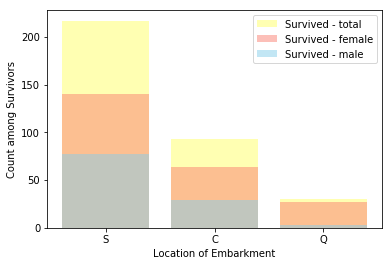

In [31]:
embarked=np.array(survived.Embarked.dropna().value_counts().index)

emb_f=np.array(survived_f.Embarked.dropna().value_counts())
emb_m=np.array(survived_m.Embarked.dropna().value_counts())
emb=np.array(survived.Embarked.dropna().value_counts())
embarked_xrange=np.arange(0,len(embarked),1)

plt.bar(embarked_xrange, emb, color='yellow', alpha=0.3, label='Survived - total')
plt.bar(embarked_xrange, emb_f, color='salmon', alpha=0.5, label='Survived - female')
plt.bar(embarked_xrange, emb_m, color='skyblue', alpha=0.5, label='Survived - male')

plt.xticks(embarked_xrange, embarked)

plt.xlabel("Location of Embarkment")
plt.ylabel("Count among Survivors")
plt.legend()
plt.show()

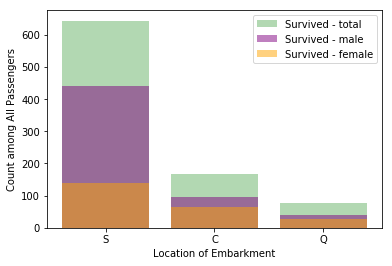

In [32]:
embarked_all=np.array(df.Embarked.dropna().value_counts().index)

emb_af=np.array(all_f.Embarked.dropna().value_counts())
emb_am=np.array(all_m.Embarked.dropna().value_counts())
emb_a=np.array(df.Embarked.dropna().value_counts())
embarked_all_xrange=np.arange(0,len(embarked_all),1)

plt.bar(embarked_all_xrange, emb_a, color='green', alpha=0.3, label='Survived - total')
plt.bar(embarked_all_xrange, emb_am, color='purple', alpha=0.5, label='Survived - male')
plt.bar(embarked_all_xrange, emb_f, color='orange', alpha=0.5, label='Survived - female')

plt.xticks(embarked_all_xrange, embarked_all)

plt.xlabel("Location of Embarkment")
plt.ylabel("Count among All Passengers")
plt.legend()
plt.show()

In [33]:
print("% of all passengers embarked from Southampton = ", round(len(df[df['Embarked']=='S'])/len(df)*100,2))
print("% of all passengers embarked from Cherbourg = ",round(len(df[df['Embarked']=='C'])/len(df)*100,2))
print("% of all passengers embarked from Queenstown = ", round(len(df[df['Embarked']=='Q'])/len(df)*100,2))

print("% survivors embarked from Southampton =", round(len(survived[survived['Embarked']=='S'])/len(survived)*100,2))
print("% survivors embarked from Cherbourg =", round(len(survived[survived['Embarked']=='C'])/len(survived)*100,2))
print("% survivors embarked from Queensland =", round(len(survived[survived['Embarked']=='Q'])/len(survived)*100,2))

% of all passengers embarked from Southampton =  72.28
% of all passengers embarked from Cherbourg =  18.86
% of all passengers embarked from Queenstown =  8.64
% survivors embarked from Southampton = 63.45
% survivors embarked from Cherbourg = 27.19
% survivors embarked from Queensland = 8.77


In [34]:
#Split of survivors for each location approximately proportional to total passenger boarding location split. Southampton slightly
#lower, Cherbourg slightly higher

print("% of passengers embarked from Southampton that were female = ", round(len(df[(df['Embarked']=='S') & (df['Sex']=='female')])/len(df[df['Embarked']=='S'])*100, 2))
print("% of passengers embarked from Cherbourg that were female = ", round(len(df[(df['Embarked']=='C') & (df['Sex']=='female')])/len(df[df['Embarked']=='C'])*100, 2))
print("% of passengers embarked from Queensland that were female = ", round(len(df[(df['Embarked']=='Q') & (df['Sex']=='female')])/len(df[df['Embarked']=='Q'])*100, 2))

% of passengers embarked from Southampton that were female =  31.52
% of passengers embarked from Cherbourg that were female =  43.45
% of passengers embarked from Queensland that were female =  46.75


In [35]:
#Based on boarding location, looks like Southampton had the loweset percent of females.
#This may be why % of survivors from Southampton were lower than proportional

In [36]:
#Are passengers aged 15-40 more likely to survive because they are by themselves?
survived_15_40=survived.loc[(survived['Age']<=40) & ((survived['Age']>=15))]
survived_15_40.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 1 to 889
Data columns (total 9 columns):
Survived    190 non-null int64
Pclass      190 non-null int64
Sex         190 non-null object
Age         190 non-null float64
SibSp       190 non-null int64
Parch       190 non-null int64
Fare        190 non-null float64
Embarked    189 non-null object
Family      190 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 14.8+ KB


In [37]:
print("% of survivors that belong to the 15-40 age group = ", round(len(survived_15_40)/len(survived)*100,2))

% of survivors that belong to the 15-40 age group =  55.56


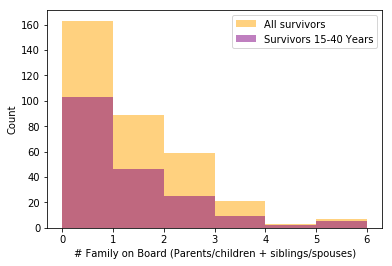

In [38]:
#Compare distribution of family members count of survivors 15-40 years of age against that of all survivors

bins_15_40=np.arange(0,max(survived_15_40.Family.max(), survived_15_40.Family.max())+1, 1)
plt.hist(survived.Family, bins=bins_15_40, alpha=0.5, color= 'orange', label='All survivors')
plt.hist(survived_15_40.Family, bins=bins_15_40, alpha=0.5, color='purple', label='Survivors 15-40 Years')
plt.xlabel('# Family on Board (Parents/children + siblings/spouses)')
plt.ylabel('Count')
plt.legend()
plt.show()

In [39]:
#Relatives = 0 distributions for survivors in age segment approximately proportional to that of all survivors,
#slightly higher

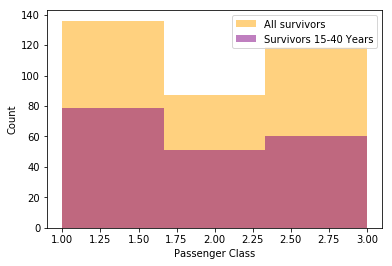

In [40]:
#Does class play a role?

plt.hist(survived.Pclass, bins=3, alpha=0.5, color='orange', label='All survivors')
plt.hist(survived_15_40.Pclass, bins=3, alpha=0.5, color='purple', label='Survivors 15-40 Years')
plt.xticks=[1,2,3]
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend()
plt.show()

In [41]:
#Passenger class distribution looks proportional as well.

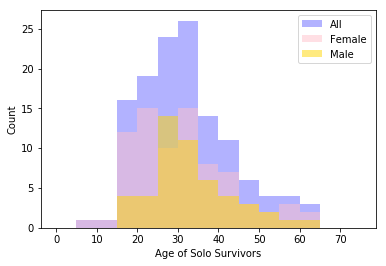

In [44]:
#Let's go back to srvivors traveling alone
alone_s=survived.loc[survived['Family']==0]
alone_s_age_bins=np.arange(0, alone_s.Age.max().astype(int), 5)

plt.hist(alone_s.Age.dropna(), alpha=0.3, bins=alone_s_age_bins, color='blue', label='All')
plt.hist(alone_s[alone_s['Sex']=='female'].Age.dropna(), alpha=0.5, bins=alone_s_age_bins, color='pink', label='Female')
plt.hist(alone_s[alone_s['Sex']=='male'].Age.dropna(), alpha=0.5, bins=alone_s_age_bins,color='gold',label='Male')
plt.legend()
plt.xlabel("Age of Solo Survivors")
plt.ylabel("Count")
plt.show()

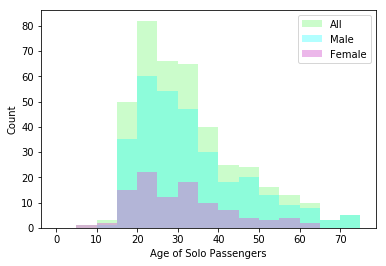

In [45]:
#Let's go back to srvivors traveling alone
alone=df.loc[df['Family']==0]
alone_age_bins=np.arange(0, alone.Age.max().astype(int), 5)
alone.head()
plt.hist(alone.Age.dropna(), alpha=0.5, bins=alone_age_bins, color='palegreen', label='All')
plt.hist(alone[alone['Sex']=='male'].Age.dropna(), alpha=0.3, bins=alone_age_bins,color='cyan',label='Male')
plt.hist(alone[alone['Sex']=='female'].Age.dropna(), alpha=0.5, bins=alone_age_bins, color='orchid', label='Female')
plt.legend()
plt.xlabel("Age of Solo Passengers")
plt.ylabel("Count")
plt.show()

In [46]:
#Age distribution of solo travellers similar among survivors and all passengers. Most between ages of 15-40.

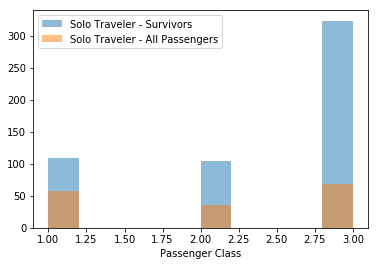

In [47]:
#What about class? Do most solo travelers happen to be first class?
plt.hist(alone['Pclass'], alpha=0.5, label='Solo Traveler - Survivors')
plt.hist(alone_s['Pclass'], alpha=0.5, label='Solo Traveler - All Passengers')
plt.legend()
plt.xlabel("Passenger Class")
plt.show()

In [48]:
#Survivors from first and third class look comparable, and is not proportional to the total solo travelers belonging to those
#classes. Therefore, passenger class does not largely influence probability of survival.

In [49]:
#Based on the data available, it seems that females within this age range who travel alone are most likely to survive.